# Gestion des recommandations

## Recuperation des données

In [58]:
import json
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import random

# Load the data
dir1 = "images"
dir2 = "ExifDatatest.json"
dir = os.path.join(dir1, dir2)

data = pd.read_json(dir)
data['result'] = random.choices(["Yes", "No"], k=len(data))
print(data.head())
print(data.tail())

       theme              image  width  height format orientation  color_0  \
0  Exoplanet  109_Piscium_b.jpg    411     367   JPEG     no exif  #010101   
1  Exoplanet  14_Herculis_b.jpg    479     441   JPEG           1  #010101   
2  Exoplanet  14_Herculis_c.jpg    456     425   JPEG           1  #010101   
3  Exoplanet    16_Cygni_Bb.jpg   1152     794   JPEG     no exif  #927c60   
4  Exoplanet  18_Delphini_b.jpg    989     644    PNG     no exif  #020101   

   color_1  color_2  color_3  color_4        red      green       blue result  
0  #ada598  #7b726a  #45423f  #171616  23.787473  22.550236  20.864131    Yes  
1  #827163  #b59e8a  #50463e  #191816  18.940267  16.545520  14.611776    Yes  
2  #baa38f  #695c51  #937f6e  #3c3530  25.669345  22.394966  19.626594    Yes  
3  #020101  #665342  #bdae99  #38281c  25.167594  20.532356  16.156877     No  
4  #302953  #536694  #25223c  #3b3d6d  20.101739  18.960585  34.368523    Yes  
        theme              image  width  height for

## Labelisation des données

In [59]:
# on enleve les colonnes inutiles
data.drop('orientation', axis=1, inplace=True)
data.head()

,theme,image,width,height,format,color_0,color_1,color_2,color_3,color_4,red,green,blue,result
0,Exoplanet,109_Piscium_b.jpg,411,367,JPEG,#010101,#ada598,#7b726a,#45423f,#171616,23.787473,22.550236,20.864131,Yes
1,Exoplanet,14_Herculis_b.jpg,479,441,JPEG,#010101,#827163,#b59e8a,#50463e,#191816,18.940267,16.545520,14.611776,Yes
2,Exoplanet,14_Herculis_c.jpg,456,425,JPEG,#010101,#baa38f,#695c51,#937f6e,#3c3530,25.669345,22.394966,19.626594,Yes
3,Exoplanet,16_Cygni_Bb.jpg,1152,794,JPEG,#927c60,#020101,#665342,#bdae99,#38281c,25.167594,20.532356,16.156877,No
4,Exoplanet,18_Delphini_b.jpg,989,644,PNG,#020101,#302953,#536694,#25223c,#3b3d6d,20.101739,18.960585,34.368523,Yes


In [60]:
# label encoder
themeLabel = LabelEncoder()
data['theme'] = themeLabel.fit_transform(data['theme'])
imageLabel = LabelEncoder()
data['image'] = imageLabel.fit_transform(data['image'])
widthLabel = LabelEncoder()
data['width'] = widthLabel.fit_transform(data['width'])
heightLabel = LabelEncoder()
data['height'] = heightLabel.fit_transform(data['height'])
formatLabel = LabelEncoder()
data['format'] = formatLabel.fit_transform(data['format'])
color_0Label = LabelEncoder()
data['color_0'] = color_0Label.fit_transform(data['color_0'])
color_1Label = LabelEncoder()
data['color_1'] = color_1Label.fit_transform(data['color_1'])
color_2Label = LabelEncoder()
data['color_2'] = color_2Label.fit_transform(data['color_2'])
color_3Label = LabelEncoder()
data['color_3'] = color_3Label.fit_transform(data['color_3'])
color_4Label = LabelEncoder()
data['color_4'] = color_4Label.fit_transform(data['color_4'])
redLabel = LabelEncoder()
data['red'] = redLabel.fit_transform(data['red'])
greenLabel = LabelEncoder()
data['green'] = greenLabel.fit_transform(data['green'])
blueLabel = LabelEncoder()
data['blue'] = blueLabel.fit_transform(data['blue'])
resultLabel = LabelEncoder()
data['result'] = resultLabel.fit_transform(data['result'])

data.head()
data.tail()


,theme,image,width,height,format,color_0,color_1,color_2,color_3,color_4,red,green,blue,result
350,3,302,81,108,0,264,248,44,347,168,339,314,295,0
351,3,315,119,138,0,155,327,59,270,238,305,333,330,1
352,3,316,58,71,0,118,187,307,127,39,198,229,236,1
353,3,330,151,179,0,181,87,322,245,25,219,232,281,0
354,3,333,165,199,0,83,173,103,257,51,186,249,287,0


## Utilisation d'un arbre de décision

In [61]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
data_tc = data.drop('result', axis=1).iloc[0:int(len(data)*0.7)]
data_result = data['result'].iloc[0:int(len(data)*0.7)]
dtc = dtc.fit(data_tc , data_result)
data_result

0      1
1      1
2      1
3      0
4      1
      ..
243    0
244    1
245    1
246    1
247    0
Name: result, Length: 248, dtype: int64

## On affiche l'arbre de decision

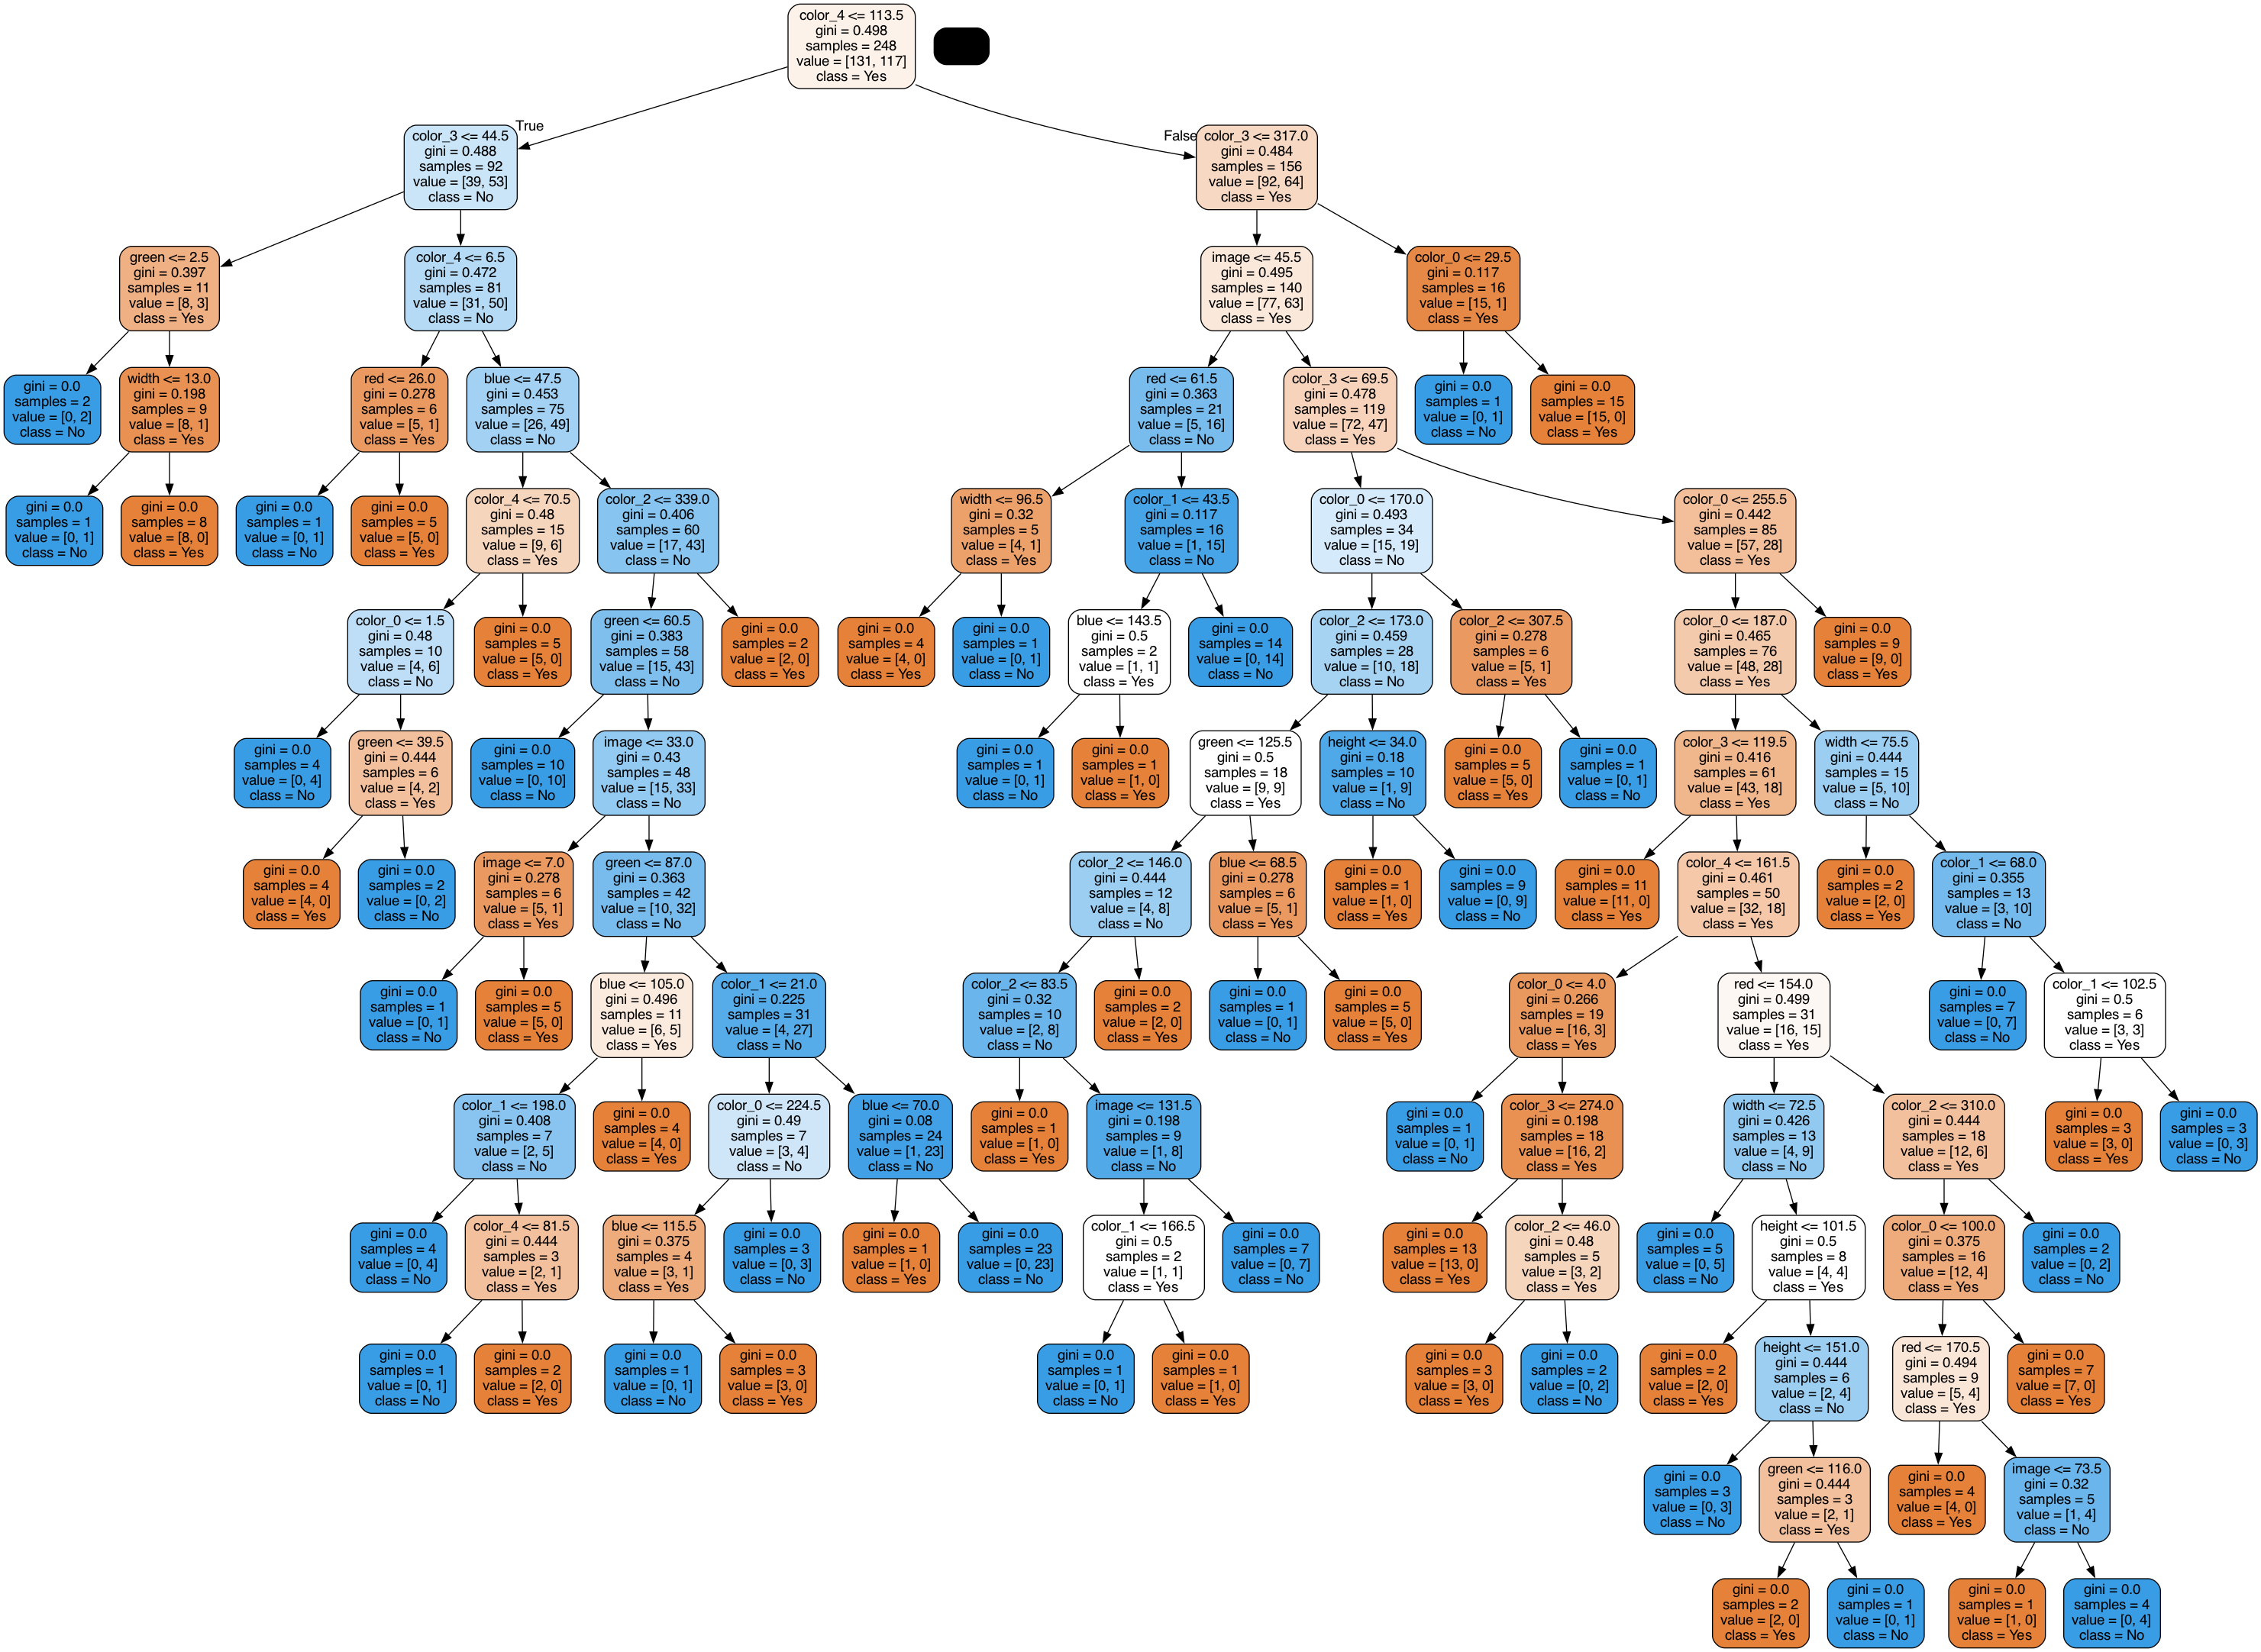

True

In [64]:

import graphviz
import pydotplus
from IPython.display import Image, display

dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=data_tc.columns,
        filled=True, rounded=True, 
        class_names =
        resultLabel.inverse_transform(
        pd.DataFrame(data_result).result.unique())
        ) 
graph = graphviz.Source(dot_data) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)
#pydot_graph.write_png('tree.png')


## Prediction



In [ ]:

prediction = dtc.predict(
    [[
        le1.transform(["red"])[0],
        le2.transform(["nature"])[0],
        le3.transform(["thumbnail"])[0],
        le4.transform(["portrait"])[0],
    ]]
)
print(le5.inverse_transform(prediction))
print(dtc.feature_importances_)

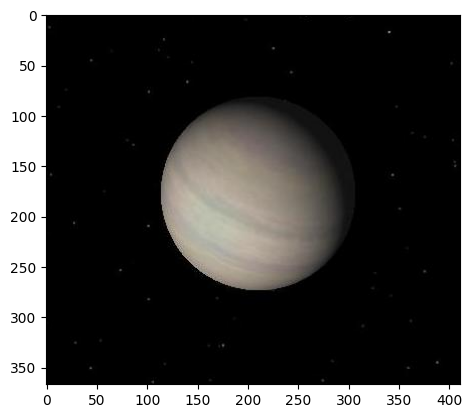

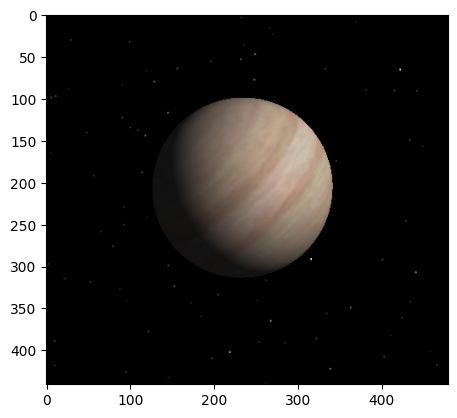

KeyboardInterrupt: Interrupted by user

In [2]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dir = "images"
themes =  os.listdir(dir)

for theme in themes: 
    if theme in {".DS_Store", "ExifData.json","ExifData2.json","ExifDatatest.json"}:
        pass 
    else:
        dir_test = os.path.join(dir, theme)
        for image in os.listdir(dir_test):
            if image.endswith(".jpg") :
                img_path = os.path.join(dir, theme, image)
                img = mpimg.imread(img_path)
                imgplot = plt.imshow(img)
                plt.show()
                test = input("Voulez vous ajouter cette image à votre collection ? (y/n)")
